In [1]:
from tools import *

devices: PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [2]:
prepare_dirs(task='testing-lstm')

Downloading...
From (original): https://drive.google.com/uc?id=1TnV9sAX2My-R3iSGamX3rVAezoBsGY_M
From (redirected): https://drive.google.com/uc?id=1TnV9sAX2My-R3iSGamX3rVAezoBsGY_M&confirm=t&uuid=faf78232-ed0c-4459-8dd1-d1e1cd0e112e
To: D:\virtualenv\src\thesis\cmapss\testing\lstm\input\CMAPSSData\FD001.zip
100%|█████████████████████████████████████████████████████████████████████████████| 29.5M/29.5M [00:03<00:00, 8.18MB/s]


Extracting FD001.zip...
Extraction complete: ./input\CMAPSSData


Downloading...
From: https://drive.google.com/uc?id=1j9xSyJ8b-5Mu3aL2SJvMXg8jYRFwfLrS
To: D:\virtualenv\src\thesis\cmapss\testing\lstm\input\models\FD001.zip
100%|█████████████████████████████████████████████████████████████████████████████| 1.70M/1.70M [00:00<00:00, 5.51MB/s]

Extracting FD001.zip...
Extraction complete: ./input\models
Input directory
'./input'
URL input dataset
'https://drive.google.com/file/d/1LU1DQuv7_CzBy2_Abgjg3HsvNDme361O/view?usp=drive_link'
Input dataset directory
'./input\\CMAPSSData'
Output directory
'./working'
Output evaluation directory
'./working\\evaluation'
Output plots directory
'./working\\plots'


In [3]:
data_ftype = '.npy'

# testing features data preprocessed
ts_test_features_name = 'ts_test_features' + data_ftype
ts_test_features_path = os.path.join(dataset_dir, ts_test_features_name)
ts_test_features = np.load(ts_test_features_path)

# testing targets data preprocessed
ts_test_targets_name = 'ts_test_targets' + data_ftype
ts_test_targets_path = os.path.join(dataset_dir, ts_test_targets_name)
ts_test_targets = np.load(ts_test_targets_path)

# testing windows generated
test_windows_generated_name = 'test_windows_generated' + data_ftype
test_windows_generated_path = os.path.join(dataset_dir, test_windows_generated_name)
test_windows_generated = np.load(test_windows_generated_path)

In [4]:
ftype = 'keras'
modeltype = 'LSTM'
model_name = '{}_{}.{}'.format(dataset_name, modeltype, ftype)
model_path = os.path.join(models_dir, model_name)

model = keras.models.load_model(filepath=model_path)

In [5]:
predictions = model.predict(ts_test_features).reshape(-1)
predictions = get_mean_predictions_per_engine(predictions=predictions, windows_generated=test_windows_generated)
ftype = 'json'
lstm_predictions_name = '{}_{}_predictions.{}'.format(dataset_name, modeltype, ftype)
lstm_predictions_path = os.path.join(out_evaluation_dir, lstm_predictions_name)
with open(lstm_predictions_path, 'w') as f:
    json.dump({'predictions': predictions}, f, indent=4)
nprint('LSTM model predictions path', lstm_predictions_path)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
LSTM model predictions path
'./working\\evaluation\\FD001_LSTM_predictions.json'


In [6]:
targets = ts_test_targets
ftype = 'json'
lstm_targets_name = '{}_{}_targets.{}'.format(dataset_name, modeltype, ftype)
lstm_targets_path = os.path.join(out_evaluation_dir, lstm_targets_name)
with open(lstm_targets_path, 'w') as f:
    json.dump({'targets': targets.tolist()}, f, indent=4)
nprint('LSTM model targets path', lstm_targets_path)

rmse, mse, mae, r2, s = metrics(targets=targets, predictions=predictions)
lstm_scores = pd.DataFrame(index=['LSTM'], data=[[rmse, mse, mae, r2, s]], columns=['rmse', 'mse', 'mae', 'r2', 's'])
ftype = 'json'
lstm_scores_name = '{}_{}_scores.{}'.format(dataset_name, modeltype, ftype)
lstm_scores_path = os.path.join(out_evaluation_dir, lstm_scores_name)
lstm_scores_dict = lstm_scores.to_dict(orient='records')
with open(lstm_scores_path, 'w') as f:
    json.dump({'scores': lstm_scores_dict}, f, indent=4)
nprint('LSTM model scores path', lstm_scores_path)
lstm_scores

LSTM model targets path
'./working\\evaluation\\FD001_LSTM_targets.json'
LSTM model scores path
'./working\\evaluation\\FD001_LSTM_scores.json'


,rmse,mse,mae,r2,s
LSTM,14.990202,224.706169,11.794723,0.869877,412.904802


LSTM targets vs predictions path
'./working\\plots\\FD001_LSTM_targets_vs_predictions.jpg'


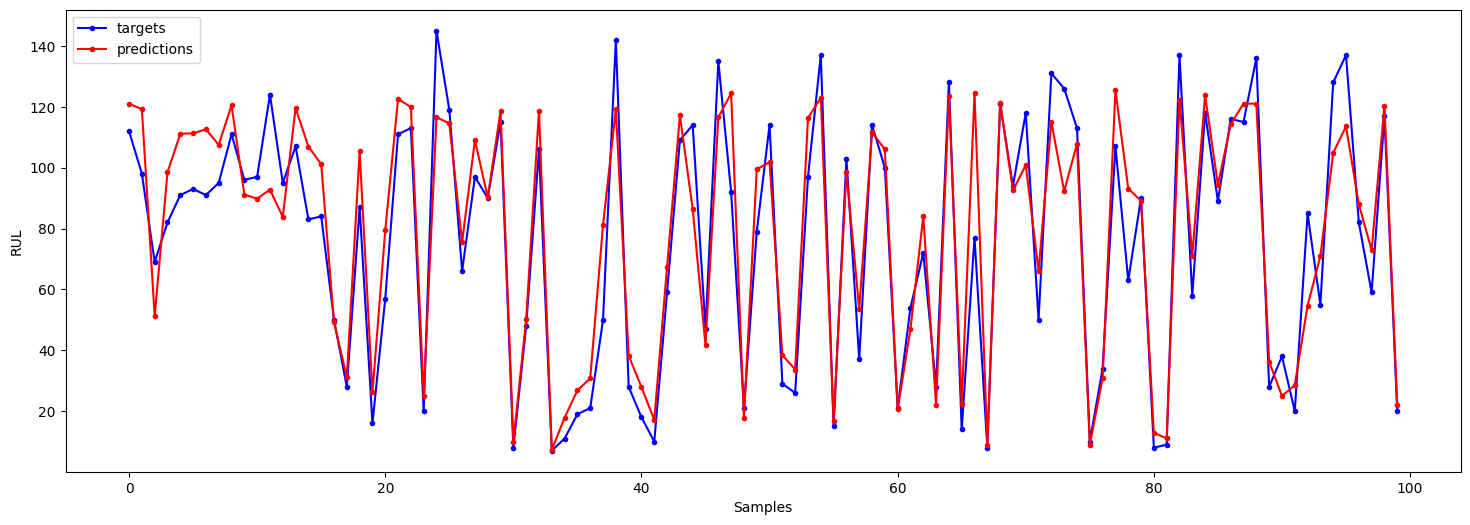

In [7]:
fig, ax = plt.subplots(1, figsize=(18,6))
ax.plot(targets, label='targets', color='blue', marker='.')
ax.plot(predictions, label='predictions', color='red', marker='.')
ax.set_xlabel('Samples'), ax.set_ylabel('RUL')
ax.legend()
ftype = 'jpg'
lstm_tvsp_name = '{}_{}_targets_vs_predictions.{}'.format(dataset_name, modeltype, ftype)
lstm_model_tvsp_file_path = os.path.join(out_plots_dir, lstm_tvsp_name)
plt.savefig(lstm_model_tvsp_file_path, bbox_inches='tight')
nprint('LSTM targets vs predictions path', lstm_model_tvsp_file_path)
plt.show()

In [8]:
out_testing_dir = os.path.join(out_dir, dataset_name)
os.makedirs(out_testing_dir)
shutil.move(out_plots_dir, out_testing_dir)
shutil.move(out_evaluation_dir, out_testing_dir)

ftype = 'zip'
shutil.make_archive(out_testing_dir, ftype, out_testing_dir)
shutil.rmtree(out_testing_dir)